<a href="https://colab.research.google.com/github/kozltv/EEG-pycorder-matlab/blob/master/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,Conv2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,auc
import zipfile
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import pandas as pd

In [0]:
#Uncompressing zip file
zip_ref = zipfile.ZipFile('ASD_Cropped.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
# Reading data
np.random.seed(123)
my_data = np.genfromtxt('ASD_Cropped.csv', delimiter=',')

labels = my_data[1:,0].astype(dtype='int')
features = my_data[1:,1:]

print(features.shape)
print(labels.shape)

In [0]:
folds = 3
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42).split(features, labels)

In [0]:
features = features.reshape(features.shape[0],150,150,1)
print(features.shape)

(5985, 150, 150, 1)


In [0]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train, test in kfold:  
  #Defining model architecture
  model = Sequential()

  model = Sequential()
  model.add(Convolution2D(16, 2,2, activation='relu',input_shape=(150, 150,1)))

  model.add(Convolution2D(32, 2, 2, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))

  #Compiling model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  #Fitting model on training data
  hist = model.fit(features[train], labels[train],batch_size=12, nb_epoch=10, verbose=1, validation_split=0.30)
  pred = model.predict(features[test]).ravel()
  fpr, tpr, thresholds = roc_curve(labels[test], pred)
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print(roc_auc)
  aucs.append(roc_auc)
  

print("Avg AUC:", np.mean(aucs))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), activation="relu", input_shape=(150, 150,...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2792 samples, validate on 1197 samples
Epoch 1/10
2792/2792 [==============================] - 10s 3ms/step - loss: 0.3386 - acc: 0.8603 - val_loss: 2.7159 - val_acc: 0.0744
Epoch 2/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.1556 - acc: 0.9441 - val_loss: 3.0756 - val_acc: 0.1654
Epoch 3/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.0436 - acc: 0.9867 - val_loss: 6.3588 - val_acc: 0.1270
Epoch 4/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.0136 - acc: 0.9964 - val_loss: 7.1365 - val_acc: 0.1328
Epoch 5/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.0031 - acc: 0.9996 - val_loss: 7.7877 - val_acc: 0.1579
Epoch 6/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 6.9652 - val_acc: 0.1738
Epoch 7/10
2792/2792 [==============================] - 8s 3ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 7.7855 - val_acc: 0.1738
Epoch 8/10
27

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), activation="relu", input_shape=(150, 150,...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2793 samples, validate on 1197 samples
Epoch 1/10
2793/2793 [==============================] - 10s 4ms/step - loss: 0.3433 - acc: 0.8686 - val_loss: 1.8480 - val_acc: 0.0994
Epoch 2/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.1685 - acc: 0.9395 - val_loss: 1.6629 - val_acc: 0.3492
Epoch 3/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0698 - acc: 0.9785 - val_loss: 5.2073 - val_acc: 0.1086
Epoch 4/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0241 - acc: 0.9932 - val_loss: 6.1667 - val_acc: 0.1261
Epoch 5/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0164 - acc: 0.9953 - val_loss: 6.2007 - val_acc: 0.1662
Epoch 6/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0049 - acc: 0.9993 - val_loss: 8.3998 - val_acc: 0.0961
Epoch 7/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0150 - acc: 0.9953 - val_loss: 7.8984 - val_acc: 0.0944
Epoch 8/10
27

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), activation="relu", input_shape=(150, 150,...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2793 samples, validate on 1198 samples
Epoch 1/10
2793/2793 [==============================] - 10s 3ms/step - loss: 0.3523 - acc: 0.8546 - val_loss: 2.1913 - val_acc: 0.0000e+00
Epoch 2/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.1946 - acc: 0.8883 - val_loss: 2.8231 - val_acc: 0.0100
Epoch 3/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.1257 - acc: 0.9484 - val_loss: 3.5052 - val_acc: 0.0693
Epoch 4/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0962 - acc: 0.9810 - val_loss: 5.3221 - val_acc: 0.0459
Epoch 5/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0792 - acc: 0.9936 - val_loss: 5.3944 - val_acc: 0.0793
Epoch 6/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0666 - acc: 0.9989 - val_loss: 4.7074 - val_acc: 0.1745
Epoch 7/10
2793/2793 [==============================] - 8s 3ms/step - loss: 0.0581 - acc: 1.0000 - val_loss: 5.6099 - val_acc: 0.1644
Epoch 8/1

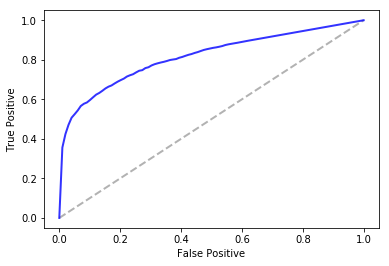

In [0]:
import matplotlib.pyplot as plt
# Line line from origin represnting random predictions
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',alpha=0.3)
#Adding to ROC plot
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'With Augmentation (AUC≈%0.2f $\pm$%0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)